#### This project of flight data analysis is finished by group, including Wen Chen and Yunxiang Wang. Research 1 and 2 are done by Wen, and research 3 is done by Yunxiang.

In [207]:
import pandas as pd
from pandas import DataFrame
filename = "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv"
flight_info = pd.read_csv(filename)
flight_info.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


## 1.Houston airports depart delay analysis

#### This depart delay analysis can be used as a report to Houston airport regulation department to overview current situation of the airport. They will know how good or how bad it currently is.

In [82]:
DataFrame(flight_info, columns = ['Origin','Dest'])[flight_info['Origin'] =='IAH'].count()

Origin    15681
Dest      15681
dtype: int64

In [75]:
DataFrame(flight_info, columns = ['Origin','Dest'])[flight_info['Origin'] =='HOU'].count()

Origin    4319
Dest      4319
dtype: int64

#### Among 20,000 data, 15,681 flights origined from IAH airport ; 4,319 flights origined from HOU airport.

In [90]:
DelayFrame = DataFrame(flight_info, columns = ['DepDelay', 'ArrDelay','Origin'])
DelayFrame[(DelayFrame['ArrDelay'] > 0) & (DelayFrame['DepDelay']> 0) & (DelayFrame['Origin'] =='IAH')].count()

DepDelay    4965
ArrDelay    4965
Origin      4965
dtype: int64

In [83]:
DelayFrame[(DelayFrame['ArrDelay'] > 0) & (DelayFrame['DepDelay']> 0) & (DelayFrame['Origin'] =='HOU')].count()

DepDelay    1988
ArrDelay    1988
Origin      1988
dtype: int64

#### 4,965 out of 15,681 flights which arrived late, departed late in IAH airport. The ratio was near 1/3.
#### 1,988 out of 4,319 flights which arrived late, departed late in HOU airport. The ratio was near 1/2.
#### From the demostration, the depart delay problem was really severe and may be one reason of  the arrival delay.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED89336EB8>]],
      dtype=object)

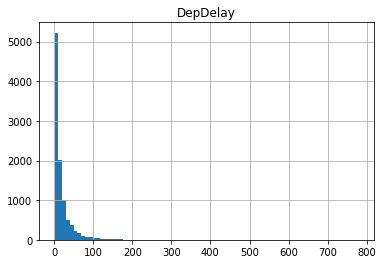

In [103]:
DelayFrame[DelayFrame['DepDelay']>0].hist(column = 'DepDelay',bins=80)

#### From the graph above, most delay time were ranging from 0 to 180 minutes. So I will narrow down the delay time range to 180 to show histogram.

In [102]:
DelayFrame['DepDelay'][DelayFrame['DepDelay']>0].describe()

count    10032.000000
mean        19.408892
std         29.539207
min          1.000000
25%          4.000000
50%         10.000000
75%         23.000000
max        780.000000
Name: DepDelay, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED89C87C50>]],
      dtype=object)

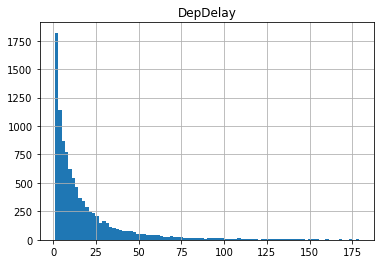

In [132]:
DelayFrame_180 = DelayFrame[(0 < DelayFrame['DepDelay'] ) & (DelayFrame['DepDelay']< 180)]
DelayFrame_180.hist(column = 'DepDelay',bins=90)

In [108]:
DelayFrame_180['DepDelay'].describe()

count    9987.000000
mean       18.381896
std        24.386059
min         1.000000
25%         4.000000
50%        10.000000
75%        23.000000
max       179.000000
Name: DepDelay, dtype: float64

#### 1. Among 10032 depart delay cases, 9,987 cases ranged in 180 minutes, whose percentage was 99.5%.
#### 2. The mean is 19.4, the 25 percentile is 4 minutes, the half percentile is 10 minutes, and the 75 percentile is 19 minutes.

In [112]:
Delay_dayofweek = DataFrame(flight_info, columns = ['DayOfWeek','DepDelay'])
Delay_dayofweek[Delay_dayofweek['DepDelay']>0].groupby(['DayOfWeek']).describe()

DepDelay                                                   
             count       mean        std  min  25%   50%   75%    max
DayOfWeek                                                            
1           2030.0  20.515271  29.139584  1.0  4.0  10.5  24.0  302.0
2           1189.0  20.625736  29.304400  1.0  4.0  11.0  26.0  252.0
3            996.0  15.385542  26.778638  1.0  3.0   8.0  17.0  465.0
4           1285.0  21.398444  38.090379  1.0  4.0  10.0  23.0  780.0
5           1304.0  20.423313  31.038193  1.0  3.0   9.0  23.0  351.0
6           1278.0  16.335681  25.453614  1.0  3.0   8.0  20.0  488.0
7           1950.0  19.594872  25.942055  1.0  4.0  11.0  24.0  247.0

#### The depart delay cases on Monday and Sunday almost doubled any other day of week. Wednesday had the lowest depart delay cases and mean time.

##  2.Arrival delay comparison among carriers

#### Create a new Dataframe only including UniqueCarrier and ArrDelay columns.

In [202]:
Carrier_Delay = DataFrame(flight_info, columns = ['UniqueCarrier','ArrDelay'])
Carrier_Delay.head()

,UniqueCarrier,ArrDelay
0,AA,-10.0
1,AA,-9.0
2,AA,-8.0
3,AA,3.0
4,AA,-3.0


#### Group every carrier's arrival delay data, calculate the mean and sort them with descending order.

In [184]:
Carrier_Delay.groupby(by=['UniqueCarrier']).ArrDelay.mean().sort_values(ascending = False)

UniqueCarrier
EV    13.927083
F9    13.725806
B6    11.086022
AS     9.396552
WN     8.644941
MQ     7.144615
OO     5.743106
CO     5.366780
DL     4.310924
XE     3.613172
FL     1.624060
AA     0.950397
UA    -2.234694
US    -3.595960
Name: ArrDelay, dtype: float64

#### From the demonstration, EV, F9 and B6 carriers went with the top three arrival delay average minutes. 

#### Use a2 to represent dataframe of arrival delay data numbers for every carrier.

In [192]:
a2 = Carrier_Delay.groupby(by=['UniqueCarrier']).ArrDelay.agg('count').sort_values(ascending = False)

#### Use a1 to represent dataframe of arrival late data numbers for every carrier.

In [191]:
a1 = Carrier_Delay[Carrier_Delay['ArrDelay']>0].groupby(by=['UniqueCarrier']).ArrDelay.agg('count').sort_values(ascending = False)

#### Now, we can use a1 and a2 to calculate the ratio of late arrivals.

In [204]:
arr_late_ratio = (a1 / a2).sort_values(ascending = False)
arr_late_ratio

UniqueCarrier
F9    0.758065
WN    0.538315
AS    0.517241
OO    0.515239
CO    0.482045
XE    0.443004
MQ    0.403077
DL    0.386555
EV    0.385417
FL    0.375940
B6    0.354839
AA    0.327381
UA    0.316327
US    0.276094
Name: ArrDelay, dtype: float64

#### From the arrival late ratio chart above, we can see the top late ratio carrier was F9, and the best performance carrier was US.

# 3.Analyze the time cost of IAH-LAS airline
#### Purpose of this analisis is to find the indeed time in IAH-LAS line. Get an overview of time cost in each part.It may help the passengers who want fly LAS from IAH make schedules. 


In [210]:
hflight_stat = pd.read_csv( "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv")
hflight_stat.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
19995,2011,2,25,5,1126.0,1333.0,CO,1719,N19621,187.0,...,8.0,-4.0,IAH,MTJ,926,5.0,30.0,0,NaN,0
19996,2011,2,25,5,941.0,1111.0,CO,1723,N37298,210.0,...,0.0,11.0,IAH,ONT,1334,5.0,12.0,0,NaN,0
19997,2011,2,25,5,722.0,948.0,CO,1746,N37408,146.0,...,-17.0,-3.0,IAH,ORD,925,17.0,14.0,0,NaN,0
19998,2011,2,25,5,1909.0,2216.0,CO,1748,N27239,127.0,...,-10.0,12.0,IAH,FLL,965,6.0,15.0,0,NaN,0
19999,2011,2,25,5,1255.0,1553.0,CO,1757,N14604,118.0,...,-3.0,5.0,IAH,ATL,689,13.0,22.0,0,NaN,0


In [211]:
TimeFrame=hflight_stat[(hflight_stat['Origin']== 'IAH') & (hflight_stat['Dest'] == 'LAS')]
TimeFrame['Year'].count()

248

We have 248 records(from IAH to LAS) in 2011

In [212]:
time_cost = DataFrame(TimeFrame, columns = ['DepDelay', 'ArrDelay','ActualElapsedTime','AirTime','TaxiIn','TaxiOut','Distance'])
time_cost.head()

,DepDelay,ArrDelay,ActualElapsedTime,AirTime,TaxiIn,TaxiOut,Distance
374,0.0,3.0,209.0,172.0,8.0,29.0,1222
392,11.0,13.0,215.0,190.0,7.0,18.0,1222
404,28.0,20.0,200.0,182.0,7.0,11.0,1222
422,1.0,23.0,230.0,187.0,7.0,36.0,1222
438,0.0,-10.0,200.0,179.0,9.0,12.0,1222


#### Actually, 'ActualElapsedTime' is the sum of others(not including 'Distance')

count    131.000000
mean      25.931298
std       35.513419
min        2.000000
25%        7.000000
50%       15.000000
75%       28.000000
max      219.000000
dtype: float64


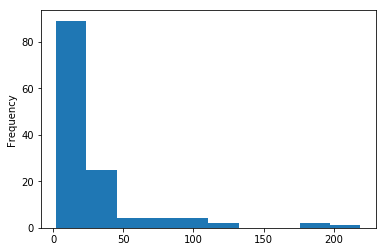

In [213]:
Delay_anl=time_cost['ArrDelay']+ time_cost['DepDelay']
print(Delay_anl[Delay_anl>0].describe())
Delay_anl[Delay_anl>0].plot(kind = 'hist')

#### We have 131 records that the total delay-time is over 0. The average of delay-time is 25.9 minutes. The max is 219 minutes. The plot shows the delay-time convergneces to 0~50 minutes.

count    248.000000
mean      26.616935
std        6.980774
min       13.000000
25%       21.750000
50%       25.000000
75%       30.000000
max       57.000000
dtype: float64


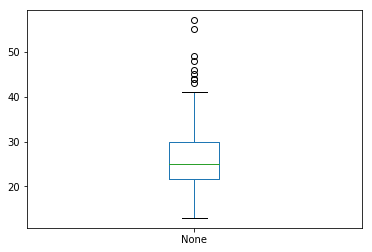

In [215]:
Taxi_anl= time_cost['TaxiIn']+time_cost['TaxiOut']
print(Taxi_anl.describe())
Taxi_anl.plot(kind = 'box')

#### We sum up "TaxiIn" and "TaxiOut" and get 248 records. The average of delay-time is 26.6 minutes. The max is 57 minutes. The plot shows the delay-time convergneces to 20~30 minutes

count    248.000000
mean     202.383065
std       11.180993
min      174.000000
25%      195.000000
50%      201.500000
75%      208.250000
max      237.000000
Name: ActualElapsedTime, dtype: float64


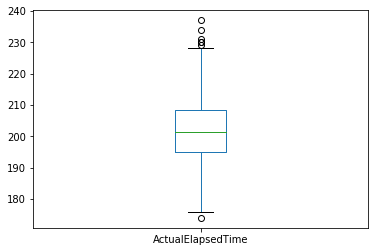

In [216]:
print(time_cost['ActualElapsedTime'].describe())
time_cost['ActualElapsedTime'].plot(kind = 'box')

In [217]:
print((time_cost['AirTime']/time_cost['ActualElapsedTime']).describe())
time_cost['ActualElapsedTime'].describe()['mean']-time_cost['AirTime'].describe()['mean']

count    248.000000
mean       0.869216
std        0.029745
min        0.753247
25%        0.853178
50%        0.873737
75%        0.890052
max        0.927374
dtype: float64


26.616935483870947

#### In conclusion, we need total 202.38 minutes in IAH-LAS line, and airtime occupies 87%, we need 26.61 minutes for declay-time and taxi in or out.By the way the airline can't take you over 237 minutes.